# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [110]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import requests
import json
import gmaps
#import time

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [111]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [112]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------") 

Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | lavrentiya
Processing Record 5 of Set 1 | mahibadhoo
Processing Record 6 of Set 1 | cibitoke
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | betania
Processing Record 9 of Set 1 | nome
Processing Record 10 of Set 1 | puerto escondido
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | sabang
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | nurota
Processing Record 17 of Set 1 | chokurdakh
City not found. Skipping...
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | hambantota
Processing Record 23 of Set 1 | baykalsk
Processing Re

Processing Record 43 of Set 4 | fukue
City not found. Skipping...
Processing Record 44 of Set 4 | homer
Processing Record 45 of Set 4 | jiangyou
Processing Record 46 of Set 4 | zanjan
Processing Record 47 of Set 4 | zhenlai
Processing Record 48 of Set 4 | abhar
Processing Record 49 of Set 4 | kalmunai
City not found. Skipping...
Processing Record 1 of Set 5 | taunggyi
City not found. Skipping...
Processing Record 2 of Set 5 | sao felix do xingu
Processing Record 3 of Set 5 | keetmanshoop
Processing Record 4 of Set 5 | cockburn harbour
Processing Record 5 of Set 5 | gevrai
Processing Record 6 of Set 5 | swiecie
Processing Record 7 of Set 5 | haines junction
Processing Record 8 of Set 5 | vardo
Processing Record 9 of Set 5 | komsomolets
City not found. Skipping...
Processing Record 10 of Set 5 | bafoulabe
Processing Record 11 of Set 5 | borogontsy
Processing Record 12 of Set 5 | upernavik
Processing Record 13 of Set 5 | soyo
Processing Record 14 of Set 5 | bud
City not found. Skipping...

Processing Record 33 of Set 8 | mandali
Processing Record 34 of Set 8 | alibag
Processing Record 35 of Set 8 | luderitz
Processing Record 36 of Set 8 | palmer
City not found. Skipping...
Processing Record 37 of Set 8 | novi bilokorovychi
Processing Record 38 of Set 8 | gannan
Processing Record 39 of Set 8 | xichang
City not found. Skipping...
Processing Record 40 of Set 8 | becerril
Processing Record 41 of Set 8 | abu zabad
Processing Record 42 of Set 8 | nemuro
Processing Record 43 of Set 8 | sao jose da coroa grande
Processing Record 44 of Set 8 | inirida
City not found. Skipping...
Processing Record 45 of Set 8 | springdale
Processing Record 46 of Set 8 | borba
Processing Record 47 of Set 8 | middlebury
Processing Record 48 of Set 8 | bodrum
Processing Record 49 of Set 8 | kodinsk
Processing Record 1 of Set 9 | sioux lookout
Processing Record 2 of Set 9 | hithadhoo
City not found. Skipping...
City not found. Skipping...
Processing Record 3 of Set 9 | port pirie
City not found. Skipp

Processing Record 14 of Set 12 | xai-xai
Processing Record 15 of Set 12 | tecoanapa
Processing Record 16 of Set 12 | kirkland lake
Processing Record 17 of Set 12 | easton
Processing Record 18 of Set 12 | yendi
Processing Record 19 of Set 12 | sarangani
Processing Record 20 of Set 12 | martapura
Processing Record 21 of Set 12 | korop
Processing Record 22 of Set 12 | natal
Processing Record 23 of Set 12 | antiguo morelos
Processing Record 24 of Set 12 | armacao dos buzios
Processing Record 25 of Set 12 | luoyang
Processing Record 26 of Set 12 | taoudenni
Processing Record 27 of Set 12 | poum
City not found. Skipping...
Processing Record 28 of Set 12 | cabedelo
Processing Record 29 of Set 12 | salinopolis
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [113]:
# build a dataframe 

# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates,
    }

# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

weather_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,49.32,81,52,3.44,ZA,1627149586
1,hermanus,-34.4187,19.2345,55.90,60,56,1.45,ZA,1627149593
2,mar del plata,43.4002,-4.0094,72.14,78,75,3.00,ES,1627149594
3,lavrentiya,65.5833,-171.0000,46.35,94,100,10.65,RU,1627149306
4,mahibadhoo,3.7833,72.9667,82.74,74,98,2.95,MV,1627149594


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
# Create a Boolean Series
# weather_dataframe['Humidity']>100
weather_dataframe_humidity=weather_dataframe[weather_dataframe['Humidity']>100]
print(weather_dataframe_humidity)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [101]:
#Export DataFrame to CSV File
weather_dataframe.to_csv(output_data_file)
weather_dataframe.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [102]:
weather_dataframe.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,79.12,83,90,1.01,US,1627139215
1,norman wells,35.2226,-97.4395,86.92,70,1,17.27,US,1627139227
2,rikitea,-23.1203,-134.9692,68.61,55,0,3.51,PF,1627139026
3,saldanha,-33.0117,17.9442,60.28,54,11,6.08,ZA,1627139153
4,anibongan,7.3933,125.7189,79.54,87,42,4.16,PH,1627139227


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

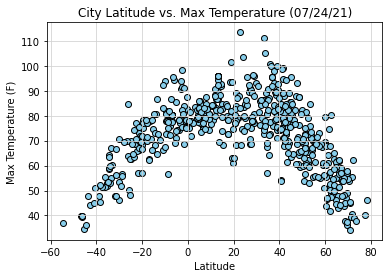

In [29]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (07/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

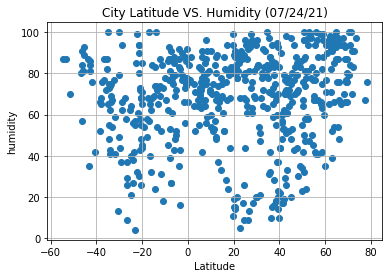

In [33]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude VS. Humidity (07/24/21)")
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude VS. Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

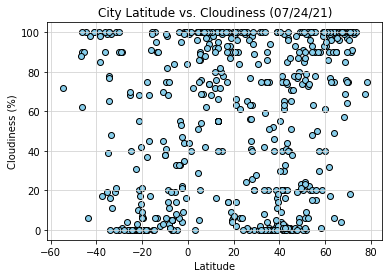

In [34]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (07/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

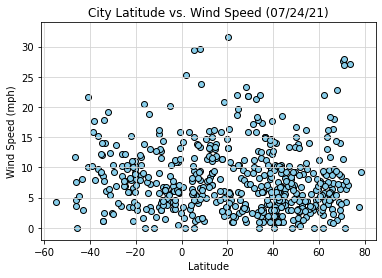

In [35]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (07/24/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [43]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.49x + 92.67
The r-squared is: -0.6691114510881714
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


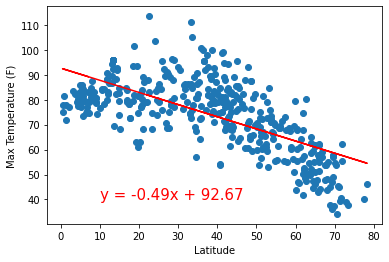

In [93]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept,rvalue, pvalue, stderr)= linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.88x + 85.74
The r-squared is: 0.8467705767965628
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


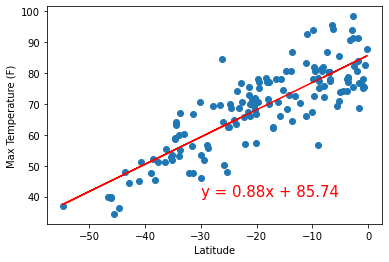

In [92]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.14x + 62.65
The r-squared is: 0.12260929843709845
The regression does not display much of a correlation between the data sets.


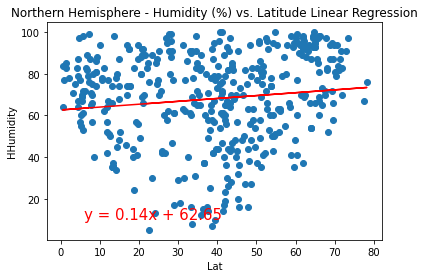

In [69]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('HHumidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.19x + 56.24
The r-squared is: -0.10850523694828162
The regression does not display much of a correlation between the data sets.


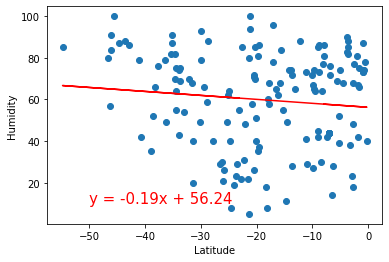

In [79]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 57.94
The r-squared is: 0.01932834840682078
The regression does not display much of a correlation between the data sets.


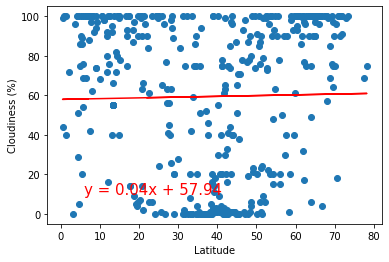

In [85]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.6x + 30.42
The r-squared is: -0.19754755386520012
The r-squared is: -0.19754755386520012
The regression does not display much of a correlation between the data sets.


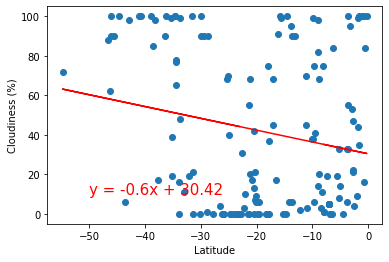

In [103]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.03x + 8.8
The r-squared is: -0.08920786036199063
The regression does not display much of a correlation between the data sets.


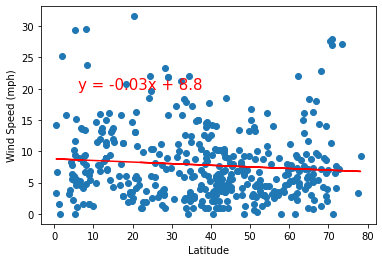

In [105]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.04x + 7.12
The r-squared is: -0.1258280978007427
The regression does not display much of a correlation between the data sets.


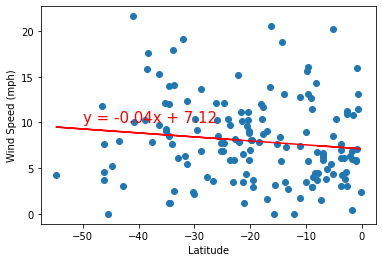

In [109]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()